### Análisis Exploratorio de Datos 🔍

El análisis exploratorio de datos (EDA), es una etapa crítica en el proceso de ciencia de datos, ya que permite comprender las características, patrones y relaciones dentro de un dataset antes de realizar análisis más complejos o modelado predictivo. En este notebook, llevaremos a cabo un EDA exhaustivo del **Movies Dataset**, el cual contiene información detallada sobre películas, incluyendo presupuestos, ingresos, géneros, fechas de lanzamiento, entre otros.

El propósito de este análisis es descubrir los patrones ocultos en los datos, identificar posibles valores atípicos, manejar los valores faltantes y evaluar la calidad de los datos. Este proceso nos ayudará a tomar decisiones fundamentadas sobre cómo tratar los datos y qué técnicas aplicar en fases posteriores.

La importancia de realizar un EDA en el campo de ciencia de datos radica en:

1. **Comprensión de los Datos**: Conocer la estructura y contenido del dataset, como el tipo de datos, su distribución, y la calidad de las variables, es clave para cualquier análisis.
   
2. **Detección de Problemas**: El EDA permite identificar valores nulos, duplicados, valores atípicos y otros problemas que podrían afectar el rendimiento de modelos predictivos o sesgar los resultados.

3. **Generación de Hipótesis**: Al explorar las relaciones entre las variables, podemos generar hipótesis que nos ayudarán a enfocar el análisis futuro, como la predicción de ingresos o la relación entre presupuesto y éxito en taquilla.

4. **Optimización del Modelado**: Un EDA bien ejecutado facilita la selección de las variables más relevantes, la transformación adecuada de los datos, y la preparación para el modelado.

En este notebook, nos enfocaremos en explorar tanto las características numéricas (presupuesto, ingresos) como las categóricas (géneros, fechas de lanzamiento) del dataset. Al final del proceso, estaremos mejor equipados para realizar análisis predictivos o segmentación de los datos, todo con una comprensión más profunda de la información que tenemos a disposición.

In [2]:
# Iniciamos exportando las librerias necesarias.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from wordcloud import WordCloud, STOPWORDS
import missingno as msno
from collections import Counter

In [21]:
#Cargamos los datos previamente procesados en el proceso ETL.
data_movies = pd.read_parquet('../datasets/complete_data.parquet')
#Formateamos la forma de visualiizar los float ya que siempre se imprimen con muchos decimales
pd.options.display.float_format = "{:.3f}".format

### 1. Comprensión y revisión calidad de datos ✅

En este paso vamos a revisar la estructura de los datos cocntenidos en el dataset así cómo una exploración rápida de su contenido, adicional visualizaremos la cantidad de datos faltantes, así cómo su porcentaje frente a el total de datos.

In [5]:
#Visualizamos 5 primeros campos con head()
data_movies.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,vote_count,name,genres,production_companies,production_countries,spoken_languages,return,release_year,directors,actors
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,None,...,5415.0,Toy Story Collection,"Animation,Comedy,Family",Pixar Animation Studios,United States of America,English,12.451801,1995,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,2413.0,None,"Adventure,Fantasy,Family","TriStar Pictures,Teitler Film,Interscope Commu...",United States of America,"English,Français",4.043035,1995,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,92.0,Grumpy Old Men Collection,"Romance,Comedy","Warner Bros.,Lancaster Gate",United States of America,English,0.000000,1995,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,34.0,None,"Comedy,Drama,Romance",Twentieth Century Fox Film Corporation,United States of America,English,5.090760,1995,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin..."
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,173.0,Father of the Bride Collection,Comedy,"Sandollar Productions,Touchstone Pictures",United States of America,English,0.000000,1995,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb..."


Aca con la ayuda del etodo describe podemos tener un buen resumen de nuestras valiables numericas dentro del dataset.

In [22]:
#Resumimos la info del dataset con la ayuda del metodo describe()
data_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,return,release_year
count,44425.000,44425.000,44425.000,44425.000,44196.000,44425.000,44425.000,44425.000,44425.000
mean,4300782.186,105872.745,2.948,11425879.374,94.552,5.630,112.004,674.171,1991.912
std,17559079.594,110093.617,6.022,64939782.168,37.893,1.905,496.534,75488.490,23.801
min,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,1874.000
25%,0.000,25998.000,0.399,0.000,85.000,5.000,3.000,0.000,1978.000
50%,0.000,58500.000,1.148,0.000,95.000,6.000,10.000,0.000,2001.000
75%,0.000,151138.000,3.770,0.000,107.000,6.800,35.000,0.000,2010.000
max,380000000.000,469172.000,547.488,2787965087.000,1256.000,10.000,14075.000,12396383.000,2020.000


Podemos también usar la distribución de frecuencias. En donde se evidencia que los datos no siguen en su mayoria una distribución normal y que hay un outlier en la variable vote_average

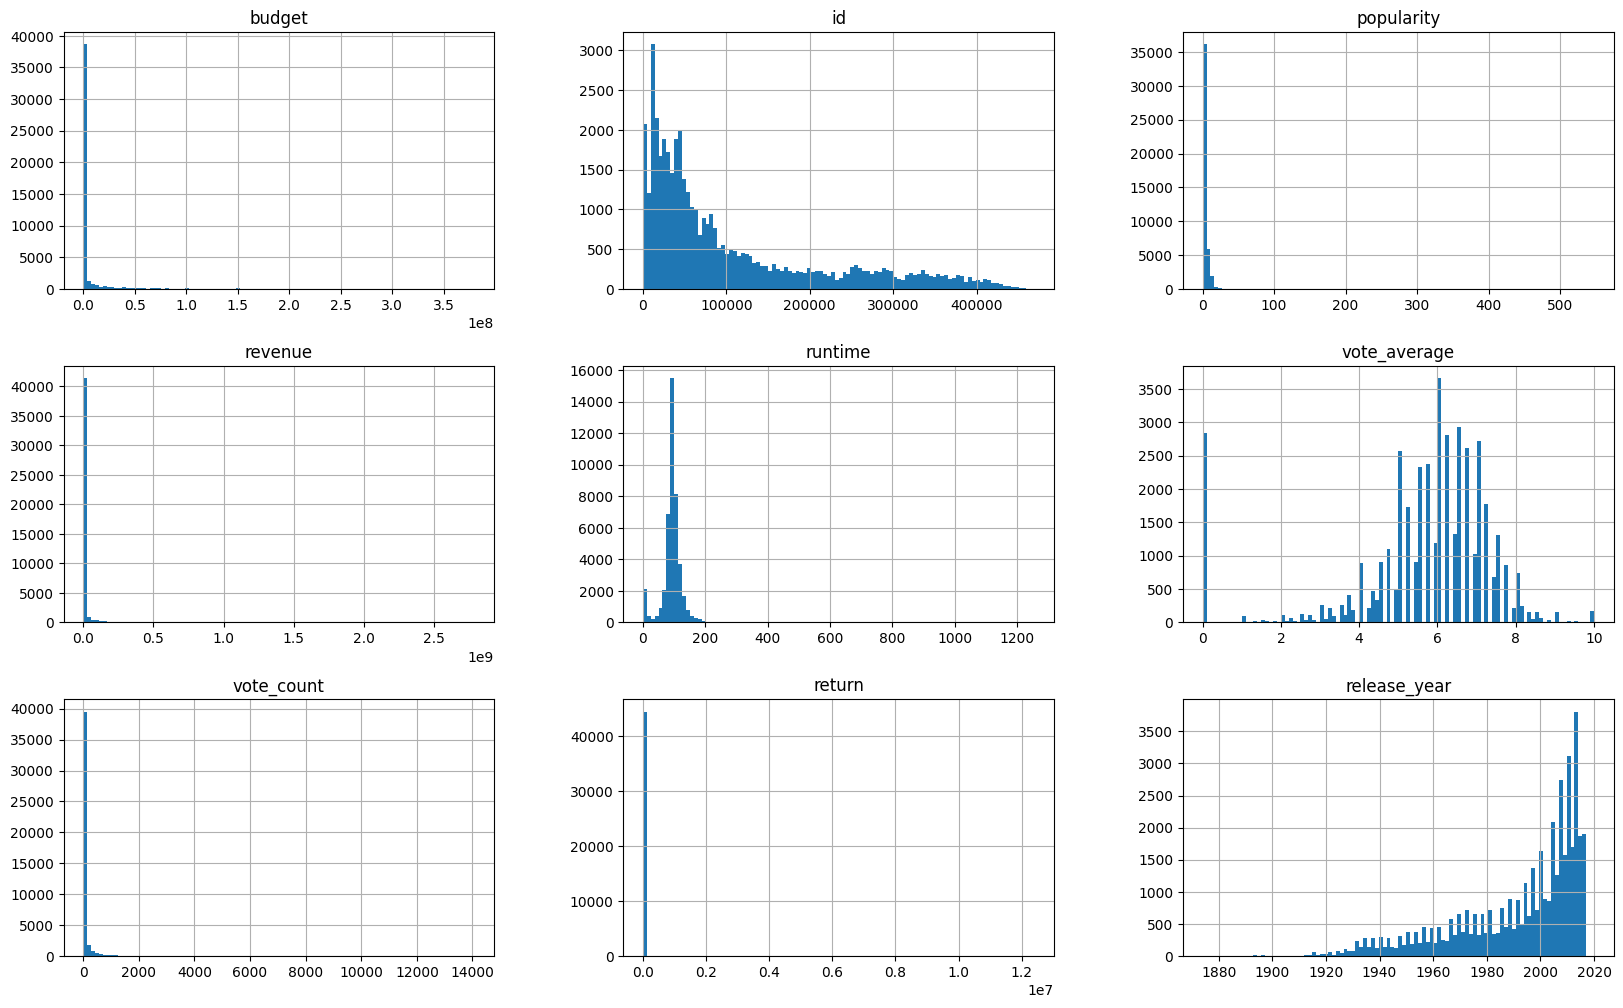

In [23]:
data_movies.hist(figsize= (20,12), bins =100)
plt.show()

Ahora queremos ver junto a las variables no númericas una descripcion general de los datos.

In [24]:
#Con la opcion include del metodo descibe incluimos variables no numericas
data_movies.describe(include='object')

,original_language,overview,release_date,status,tagline,title,name,genres,production_companies,production_countries,spoken_languages,directors,actors
count,44416,43522,44425,44349,20185,44425,4427,42136,32947,38398,40661,44425,44425
unique,89,43355,17146,6,20070,41362,1684,4023,22333,2359,1826,18807,41835
top,en,No overview found.,2008-01-01,Released,Based on a true story.,Cinderella,The Bowery Boys,Drama,Metro-Goldwyn-Mayer (MGM),United States of America,English,John Ford,nan
freq,31661,128,133,44011,7,10,29,4890,739,17626,22040,63,2290


Visualizamos valores nulos, previamente cambiamos los valores NaN string por nan de numpy.

<Axes: >

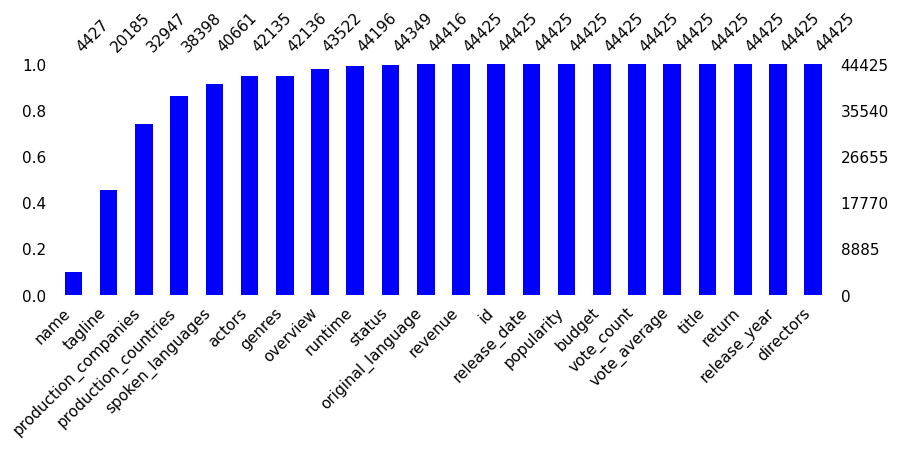

In [13]:
# Reemplazar los strings "nan" con valores np.nan
data.replace("nan", np.nan, inplace=True)

# Graficar datos faltantes de las variables. Se observa que hay valores faltantes que representan un porcentaje alto del total
msno.bar(data,figsize=(10, 3), sort="ascending",fontsize=11, color='blue')

In [25]:
# Calculamos el porcentaje de datos faltantes en cada columna
data_movies.isnull().mean() * 100

budget                  0.000
id                      0.000
original_language       0.020
overview                2.033
popularity              0.000
release_date            0.000
revenue                 0.000
runtime                 0.515
status                  0.171
tagline                54.564
title                   0.000
vote_average            0.000
vote_count              0.000
name                   90.035
genres                  5.153
production_companies   25.837
production_countries   13.567
spoken_languages        8.473
return                  0.000
release_year            0.000
directors               0.000
actors                  0.000
dtype: float64

Se decide eliminar aquellas columnas que tienen un porcentaje mayor al 10% de datos faltantes

In [31]:
#Definimos el porcentaje maximo aceptado
max_percent = 10
#Calculamos para cada columna ese porcentaje
missing_percentage = data_movies.isnull().mean() * 100
#Filtramos y dropeamos
columns_to_drop = missing_percentage[missing_percentage > max_percent].index
data_movies = data_movies.drop(columns=columns_to_drop)

<Axes: >

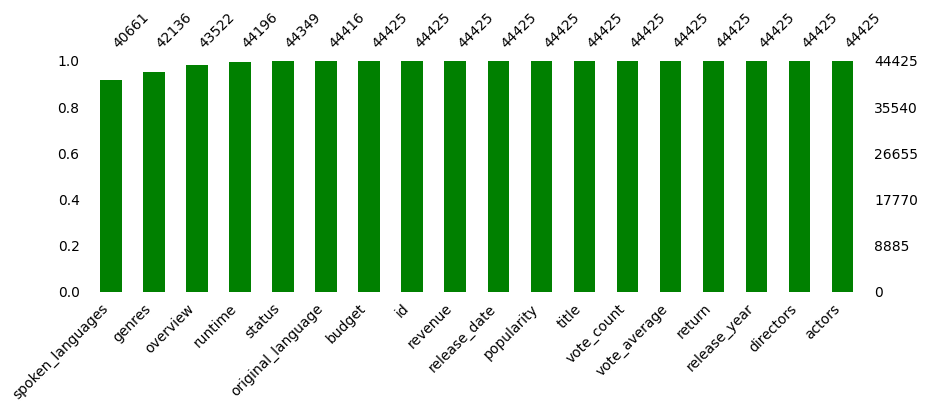

In [32]:
# Graficamos de nuevo los nulos de las variables
msno.bar(data_movies,figsize=(10, 3), sort="ascending",fontsize=10, color='green')

Se observa que los datos faltantes han disminuído en gran proporción. Se decidirá imputar o eliminar datos faltantes bluego de realizar la elección de las variables más redundantes para el modelado.

### 2. Análisis multivariable ⛓️

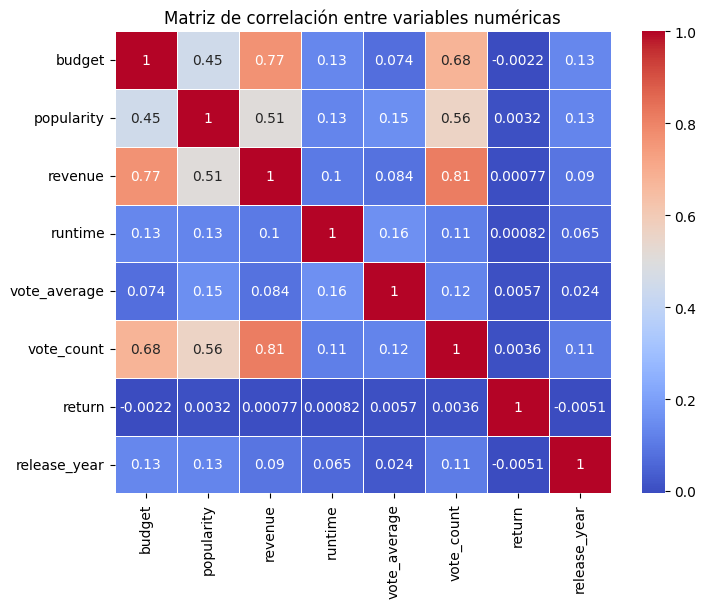

In [33]:
# 1. Analizamos la correlación entre variables numéricas
# Para variables numéricas, calculamos la correlación
correlation_matrix = data_movies[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return', 'release_year']].corr()
# Visualizamos la matriz de correlación usando un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

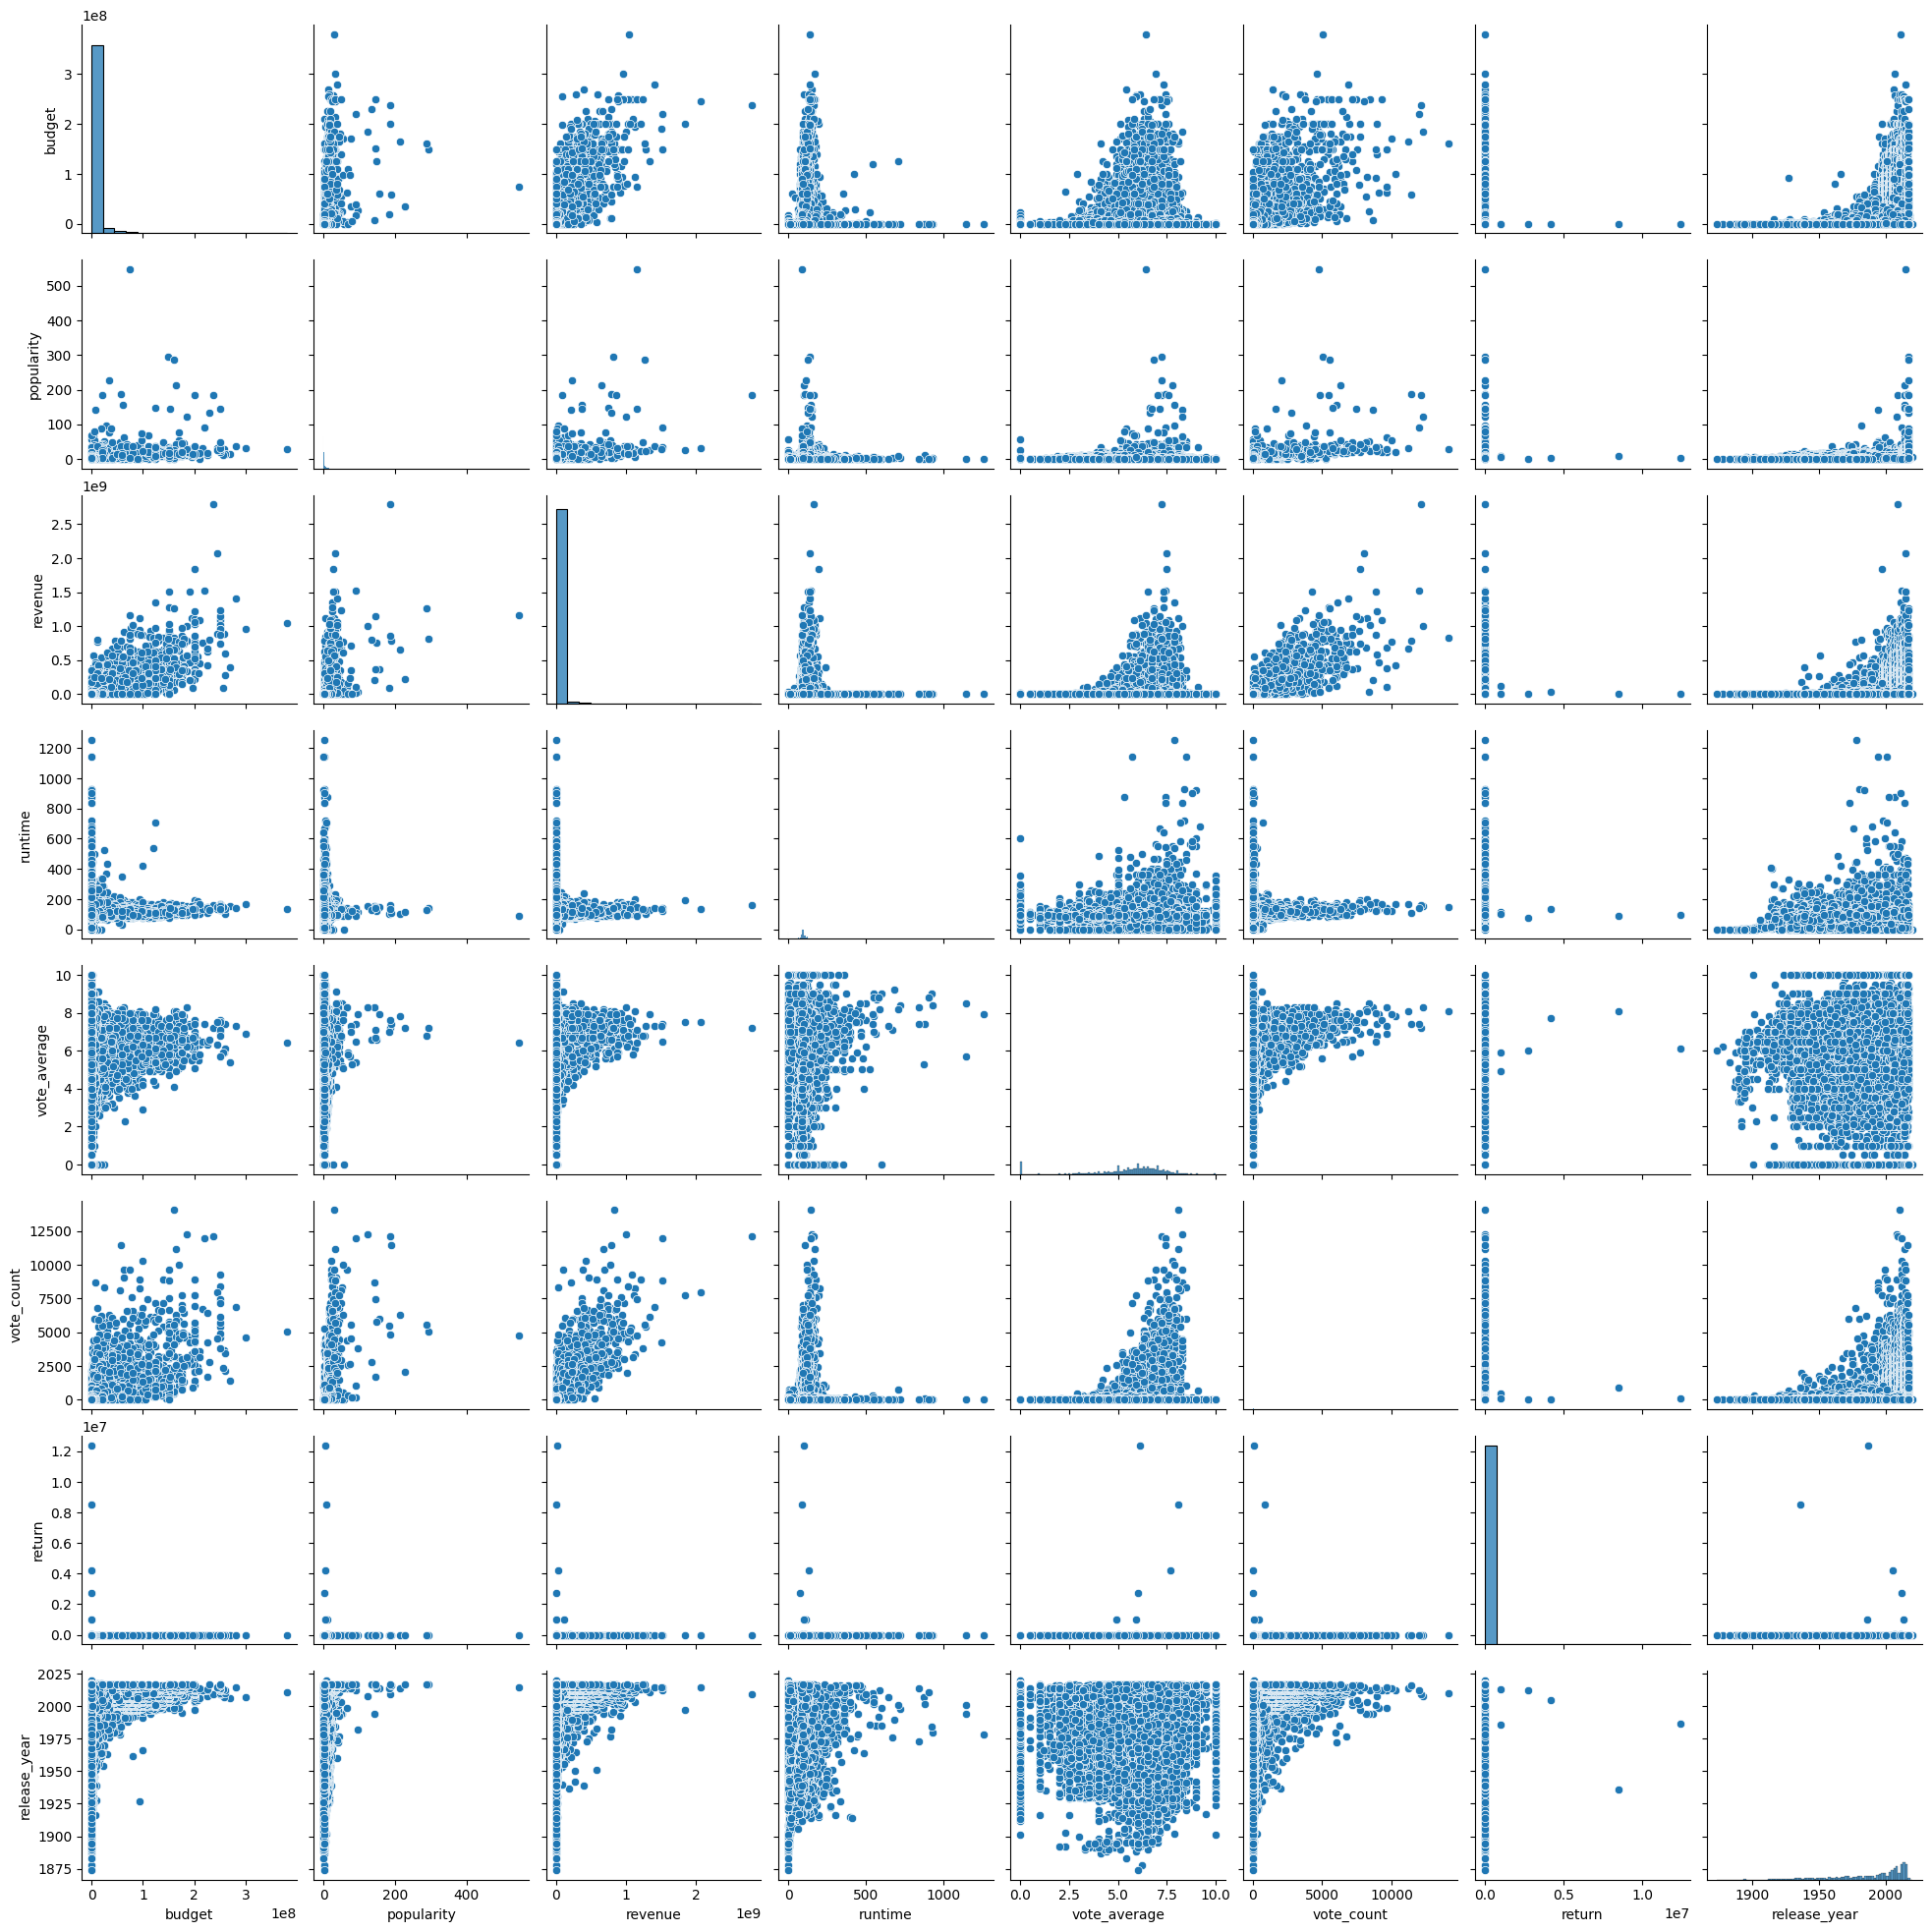

In [34]:
# 2. Gráfico de pares (Pair plot)
# Un gráfico de pares (pair plot) es útil para observar visualmente las relaciones entre variables numéricas y distribuciones.
sns.pairplot(data_movies[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return', 'release_year']])
plt.show()

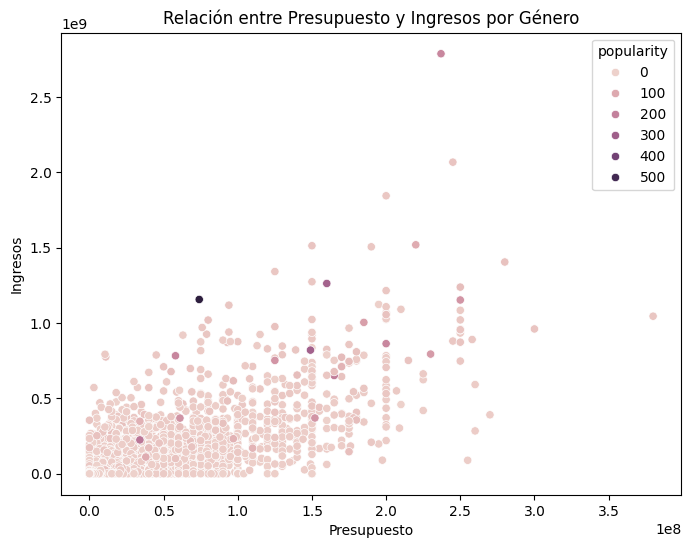

In [37]:
# 3. Gráfico de dispersión: Relación entre Presupuesto y Ingresos
# Este gráfico analiza cómo el presupuesto de una película afecta sus ingresos.
plt.figure(figsize=(8,6))
sns.scatterplot(data=data_movies, x='budget', y='revenue', hue='popularity')
plt.title('Relación entre Presupuesto y Ingresos por Populaarity')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()

Presento el siguiente análisis:
* budget y revenue (0.77): Alta correlación positiva. Indica que a mayor presupuesto, mayor es la recaudación.
* budget y vote_count (0.68): Alta correlación positiva. Sugiere que películas con mayor presupuesto tienden a recibir más votos.
* budget y popularity (0.45): Moderada correlación positiva. Las películas con mayor presupuesto tienden a ser más populares.
* popularity y vote_count (0.56): Moderada correlación positiva. Las películas más populares tienden a tener más votos.


De esto se puede concluir que Las variables con las correlaciones más fuertes son budget, revenue y vote_count. runtime y return no muestran correlaciones significativas con las demás variables. release_year tampoco muestra una correlación significativa con las otras variables. Esto sugiere que el presupuesto es un buen indicador de la popularidad, la cantidad de votos y los ingresos de una película. Sin embargo, la duración y el año de lanzamiento no son tan importantes.

### Análisis entre tres variables

Se estudiará la relación entre las variables categóricas 'actors'y 'director' con la variable 'popularity'. Se muestra un top 10 de los actores que protagonizaron más películas y de los directores que dirigieron la mayor cantidad de películas, con sus respectiva popularidad.

In [41]:
# Asegurarnos de que no haya valores NaN en las columnas 'actors', 'director' y 'popularity'
data_movies  = data_movies.dropna(subset=['actors', 'directors', 'popularity'])

# Extraer el primer actor de la lista en la columna 'actors'
data_movies['first_actor'] = data_movies['actors'].apply(lambda x: x.split(',')[0] if pd.notna(x) else '')

# Extraer el primer director de la lista en la columna 'director'
data_movies['first_director'] = data_movies['directors'].apply(lambda x: x.split(',')[0] if pd.notna(x) else '')

# Obtener los 10 directores que más películas han dirigido
top_directors = data_movies['first_director'].value_counts().head(10)
top_directors_names = top_directors.index.tolist()

# Obtener los 10 actores que más películas han protagonizado
top_actors = data_movies['first_actor'].value_counts().head(10)
top_actors_names = top_actors.index.tolist()

# Filtrar el DataFrame para los directores y actores más frecuentes
df_top_directors = data_movies[data_movies['first_director'].isin(top_directors_names)]
df_top_actors = data_movies[data_movies['first_actor'].isin(top_actors_names)]

# Calcular la popularidad promedio para los directores
avg_popularity_directors = df_top_directors.groupby('first_director')['popularity'].mean().reindex(top_directors_names).reset_index()

# Calcular la popularidad promedio para los actores
avg_popularity_actors = df_top_actors.groupby('first_actor')['popularity'].mean().reindex(top_actors_names).reset_index()

# Calcular la popularidad total para cada director
director_popularity = data_movies.groupby('first_director')['popularity'].mean().reset_index()
director_popularity = director_popularity.sort_values(by='popularity', ascending=False)
top_10_directors_popularity = director_popularity.head(10)

# Calcular la popularidad total para cada actor
actor_popularity = data_movies.groupby('first_actor')['popularity'].mean().reset_index()
actor_popularity = actor_popularity.sort_values(by='popularity', ascending=False)
top_10_actors_popularity = actor_popularity.head(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4264\3969766741.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis', ax=axes[0, 0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4264\3969766741.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='first_director', data=avg_popularity_directors, palette='plasma', ax=axes[2, 0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4264\3969766741.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='first_

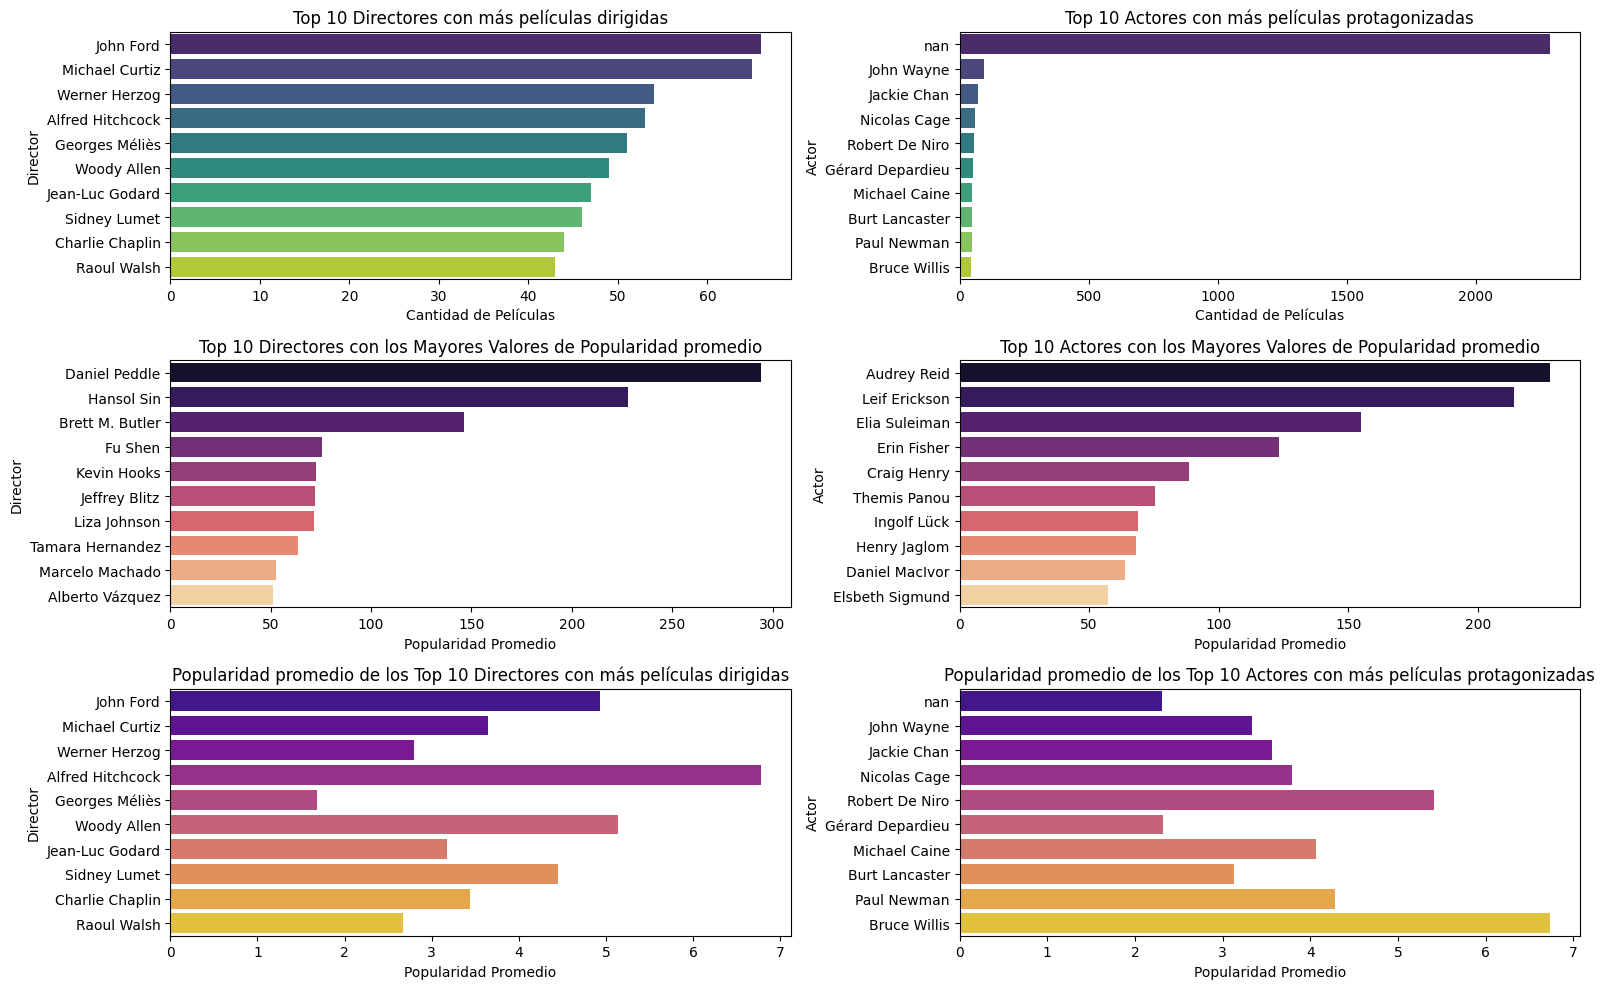

In [43]:

# Graficar los resultados
fig, axes = plt.subplots(3, 2, figsize=(16, 10))

# Gráfico de barras para directores más prolíficos
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Directores con más películas dirigidas')
axes[0, 0].set_xlabel('Cantidad de Películas')
axes[0, 0].set_ylabel('Director')

# Gráfico de barras para la popularidad promedio de los directores más prolíficos
sns.barplot(x='popularity', y='first_director', data=avg_popularity_directors, palette='plasma', ax=axes[2, 0])
axes[2, 0].set_title('Popularidad promedio de los Top 10 Directores con más películas dirigidas')
axes[2, 0].set_xlabel('Popularidad Promedio')
axes[2, 0].set_ylabel('Director')


# Gráfico de barras para la popularidad promedio de los actores más prolíficos
sns.barplot(x='popularity', y='first_actor', data=avg_popularity_actors, palette='plasma', ax=axes[2, 1])
axes[2, 1].set_title('Popularidad promedio de los Top 10 Actores con más películas protagonizadas')
axes[2, 1].set_xlabel('Popularidad Promedio')
axes[2, 1].set_ylabel('Actor')



# Gráfico de barras para los actores con mayores valores de popularidad
sns.barplot(x='popularity', y='first_actor', data=top_10_actors_popularity, palette='magma', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Actores con los Mayores Valores de Popularidad promedio')
axes[1, 1].set_xlabel('Popularidad Promedio')
axes[1, 1].set_ylabel('Actor')



# Gráfico de barras para actores más prolíficos
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Actores con más películas protagonizadas')
axes[0, 1].set_xlabel('Cantidad de Películas')
axes[0, 1].set_ylabel('Actor')




# Gráfico de barras para los directores con mayores valores de popularidad
sns.barplot(x='popularity', y='first_director', data=top_10_directors_popularity, palette='magma', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Directores con los Mayores Valores de Popularidad promedio')
axes[1, 0].set_xlabel('Popularidad Promedio')
axes[1, 0].set_ylabel('Director')

plt.tight_layout()
plt.show()

### Conclusiones y Observaciones

* Los directores prolíficos, no necesariamente tienen las películas con los mayores valores de popularidad promedio. Popularidad promedio de los directores con la mayor cantidad de peliculas.
* La popularidad de un director no siempre está correlacionada con la cantidad de películas dirigidas, sino más con la calidad o el impacto de sus películas.
* Los directores que no son tan prolíficos, dirigen películas que tienden a ser muy populares.

Y la gran coclusión es.

Se deben incluicluir tanto películas de directores y actores prolíficos como de aquellos con alta popularidad promedio para satisfacer una variedad de preferencias.

### Análisis univzriable

Atributo 'title' que corresponde a los títulos de las películas

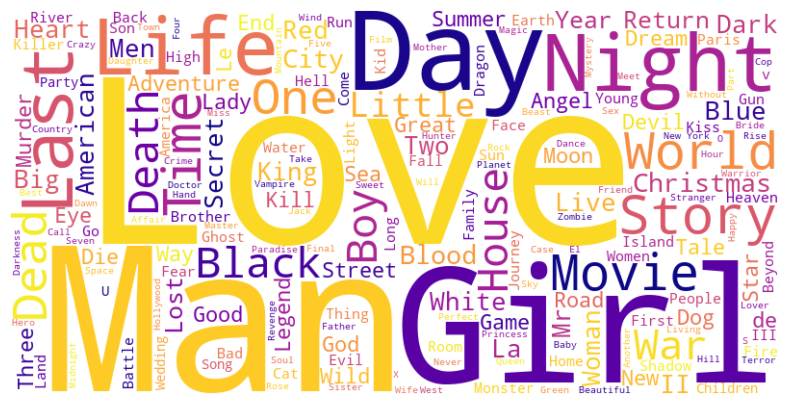

In [44]:


# Concatenar todos los géneros en una sola cadena
all_title = ' '.join(data_movies['title'].dropna().str.replace(',', ' '))

# Crear una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(all_title)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Conclusiones y Observaciones de la nube de palabras correspondiente al atributo 'title'


1. Relaciones y emociones: Palabras como "Love" y "Life" sugieren un enfoque en las relaciones humanas y las emociones.

2. Personajes: Palabras como "Man", "Girl", "Boy", "Woman", "Mr" indican que los títulos de las películas a menudo se centran en personas específicas.

3. Temporalidad: Palabras como "Day", "Night", "Time", "Last" muestran un interés en la temporalidad y momentos significativos.

4. Aventuras y escenarios: "World", "Earth", "City", "Island" sugieren una variedad de escenarios amplios y aventuras.

5. Temas oscuros: Palabras como "Dead", "Dark", "Death" indican un interés en temas de misterio, terror y muerte.

Atributo 'genres' que caracteriza a los distintos géneros

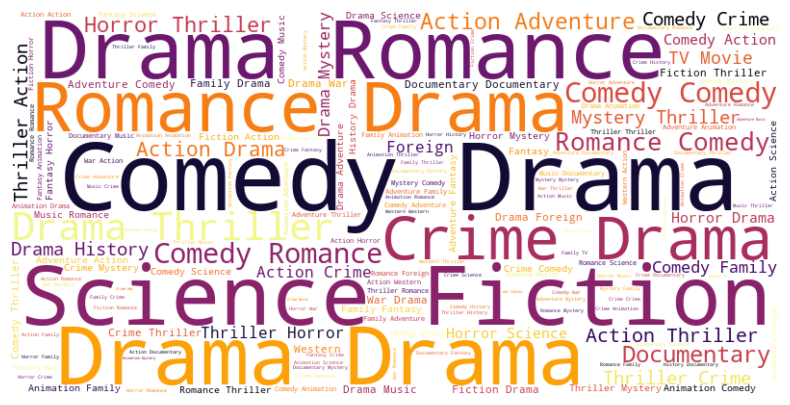

In [46]:

# Concatenar todos los géneros en una sola cadena
all_genres = ' '.join(data_movies['genres'].dropna().str.replace(',', ' '))

# Crear una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(all_genres)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Conclusiones y Observaciones de la nube de palabras correspondiente al atributo 'genres'

Géneros principales: La nube muestra que los géneros más comunes son drama, comedia y romance.

Géneros secundarios: Ciencia ficción, thriller, acción, crimen, documental y horror son también importantes, pero menos frecuentes que los principales.

Combinaciones de géneros: Es evidente que hay muchas películas que combinan géneros, como "Action Thriller", "Comedy Drama", "Romance Thriller", y "Science Fiction".

## Conclusión

Cómo resultado del análisis se seleccionan los siguientes atributos para el modelo ML:
[actors, directors, overview, taglines, genres, title]